In [2]:
## QICK LIBRARY
from qick import *

## tProc Assembler
from qick.tprocv2_assembler import Assembler, Logger

import numpy as np
import time

from matplotlib import pyplot as plt

##### Load FGPA BitStream
soc = QickSoc('./qick_4x2_jac.bit')


Measuring Instructions Between READS
-----
Test Time Elapsed:  0.010193347930908203
Time between Reads Mean > 232
Time between Reads Max > 800
Time between Reads Min > 225


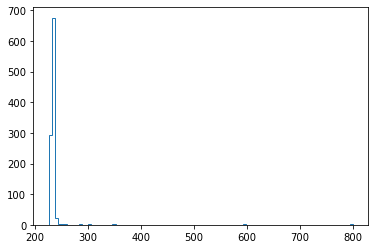

In [3]:
print('Measuring Instructions Between READS')
print('-----')
Test_qty  = 1000
Time_test  = np.zeros(Test_qty, dtype=np.int32)

asm = """
REG_WR s12  imm #0
INIT:
   REG_WR s12  op -op(s12 + #1)
   JUMP INIT
"""

p_txt, p_bin  = Assembler.str_asm2bin(asm)
soc.tproc.Load_PMEM(p_bin)
#for val in p_txt:
#    print (val)

soc.tproc.read_sel  = 1

start = time.time()

soc.tproc.start()
for i in range(0,Test_qty):
    Time_test[i] = soc.tproc.axi_r_dt1

soc.tproc.stop()
stop = time.time()


Test_var = Time_test[1:] - Time_test[:-1]

print('Test Time Elapsed: ',stop-start)
print('Time between Reads Mean >',int(np.mean(Test_var)))
print('Time between Reads Max >',np.max(Test_var))
print('Time between Reads Min >',np.min(Test_var))

plt.hist(Test_var, histtype='step', bins=100)
a = np.histogram(Test_var)



Measuring TIME Between READS
-----
Test Time Elapsed:  0.011041641235351562
Time between Reads Mean > 3009
Time between Reads Max > 46429
Time between Reads Min > 2790


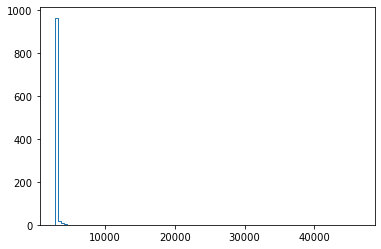

In [4]:
print('Measuring TIME Between READS')
print('-----')
Test_qty  = 1000
Time_test  = np.zeros(Test_qty, dtype=np.int32)

asm = """
JUMP HERE
"""

p_txt, p_bin  = Assembler.str_asm2bin(asm)
soc.tproc.Load_PMEM(p_bin)

start = time.time()

soc.tproc.start()
for i in range(0,Test_qty):
    Time_test[i] = soc.tproc.time_usr
soc.tproc.stop()

stop = time.time()

Test_var = Time_test[1:] - Time_test[:-1]

print('Test Time Elapsed: ',stop-start)
print('Time between Reads Mean >',int(np.mean(Test_var)))
print('Time between Reads Max >',np.max(Test_var))
print('Time between Reads Min >',np.min(Test_var))

plt.hist(Test_var, histtype='step', bins=100)
a = np.histogram(Test_var)

Measuring FLAG write TIME> reading s13 and s14
Test Time Elapsed:  0.053787946701049805
Time between Reads Mean > 431
Time between Reads Max > 1111
Time between Reads Min > 414


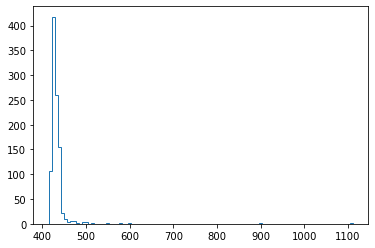

In [5]:
print('Measuring FLAG write TIME> reading s13 and s14')
Test_qty  = 1000
Time_set = np.zeros(Test_qty, dtype=np.int32)
Time_clr = np.zeros(Test_qty, dtype=np.int32)
Test_val  = np.zeros(Test_qty, dtype=np.int32)

asm = """
REG_WR s_cfg imm cfg_flg_axi

INIT:
   REG_WR s12  op -op(s12 + #1)
   REG_WR s13  imm #-1 -if(F)
   REG_WR s13  imm #2  -if(NF)
   JUMP INIT
"""

p_txt, p_bin  = Assembler.str_asm2bin(asm)
soc.tproc.Load_PMEM(p_bin)
#for val in p_txt:
#    print (val)

soc.tproc.read_sel  = 1

start = time.time()
soc.tproc.start()
for i in range(0,Test_qty):
    soc.tproc.set_axi_flg()
    Time_set[i] = soc.tproc.axi_r_dt1
    soc.tproc.clr_axi_flg()
    Time_clr[i] = soc.tproc.axi_r_dt1

soc.tproc.stop()
stop = time.time()

Test_var = Time_clr - Time_set

print('Test Time Elapsed: ',stop-start)
print('Time between Reads Mean >',int(np.mean(Test_var)))
print('Time between Reads Max >',np.max(Test_var))
print('Time between Reads Min >',np.min(Test_var))

plt.hist(Test_var, histtype='step', bins=100)
a = np.histogram(Test_var)

